In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
keras.utils.set_random_seed(21)

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

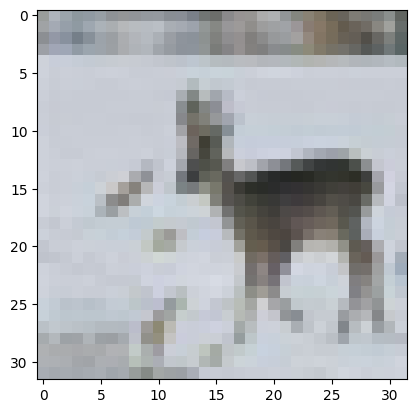

In [4]:
plt.imshow(X_train[20])

In [5]:
len(X_train), len(X_test)

(50000, 10000)

In [6]:
X_valid, X_test, y_valid, y_test = tts(X_test, y_test, test_size=0.2, random_state=21)

In [7]:
len(X_test), len(X_valid)

(2000, 8000)

In [8]:
X_train.shape

(50000, 32, 32, 3)

In [9]:
X_train = X_train/255
X_test = X_test/255
X_valid = X_valid/255

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

In [11]:
X_dataset_train = tf.data.Dataset.from_tensor_slices(X_train)
y_dataset_train = tf.data.Dataset.from_tensor_slices(y_train)

dataset_train = tf.data.Dataset.zip((X_dataset_train, y_dataset_train))

Metal device set to: Apple M1


In [12]:
X_dataset_valid = tf.data.Dataset.from_tensor_slices(X_valid)
y_dataset_valid = tf.data.Dataset.from_tensor_slices(y_valid)

dataset_valid = tf.data.Dataset.zip((X_dataset_valid, y_dataset_valid))

In [13]:
dataset_train = dataset_train.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)
dataset_valid = dataset_valid.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

In [14]:
X_dataset_test = tf.data.Dataset.from_tensor_slices(X_test)
y_dataset_test = tf.data.Dataset.from_tensor_slices(y_test)

dataset_test = tf.data.Dataset.zip((X_dataset_test, y_dataset_test))
dataset_test = dataset_test.shuffle(500).batch(256).prefetch(tf.data.experimental.AUTOTUNE)

# Exp 1


In [15]:
inputs = keras.Input(shape = (32,32,3))
x=keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=1)(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model = keras.models.Model(inputs = inputs, outputs = output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0     

In [16]:
model.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(average = 'weighted'), keras.metrics.Precision(), keras.metrics.Recall()],)

In [17]:
history = model.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=25, callbacks=tf.keras.callbacks.TensorBoard(log_dir='Exp1_logs'))

Epoch 1/25
196/196 [==============================] - 14s 67ms/step - loss: 1.7065 - f1_score: 0.3544 - precision: 0.6297 - recall: 0.1255 - val_loss: 1.4244 - val_f1_score: 0.4475 - val_precision: 0.6715 - val_recall: 0.2558
Epoch 2/25
196/196 [==============================] - 13s 65ms/step - loss: 1.3123 - f1_score: 0.5152 - precision: 0.7021 - recall: 0.3281 - val_loss: 1.2044 - val_f1_score: 0.5619 - val_precision: 0.7646 - val_recall: 0.3610
Epoch 3/25
196/196 [==============================] - 13s 64ms/step - loss: 1.1469 - f1_score: 0.5836 - precision: 0.7365 - recall: 0.4274 - val_loss: 1.0687 - val_f1_score: 0.6135 - val_precision: 0.7777 - val_recall: 0.4499
Epoch 4/25
196/196 [==============================] - 13s 64ms/step - loss: 1.0338 - f1_score: 0.6296 - precision: 0.7597 - recall: 0.4987 - val_loss: 0.9787 - val_f1_score: 0.6533 - val_precision: 0.7841 - val_recall: 0.5135
Epoch 5/25
196/196 [==============================] - 12s 63ms/step - loss: 0.9349 - f1_score: 0

In [18]:
eval_hist = model.evaluate(dataset_test)

8/8 [==============================] - 0s 35ms/step - loss: 0.7743 - f1_score: 0.7886 - precision: 0.8118 - recall: 0.7785


In [24]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist[0], 
                                                                                      eval_hist[1], 
                                                                                      eval_hist[2],
                                                                                      eval_hist[3]))

Eval_loss = 0.7742547988891602 
Eval_f1 = 0.7885706424713135 
Eval_precision = 0.8117831349372864 
Eval_recall = 0.7785000205039978


<Axes: >

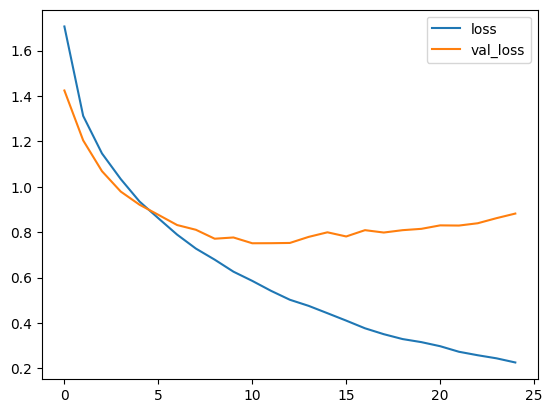

In [25]:
#График изменения функции потерь
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

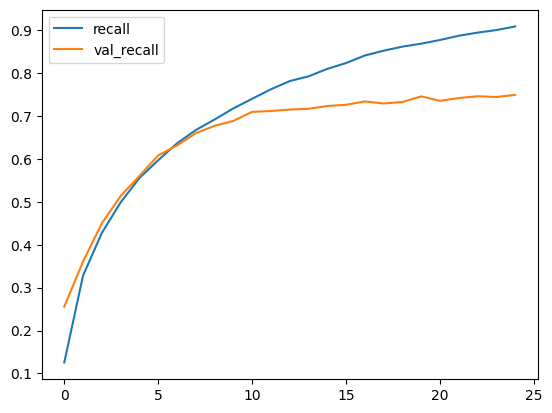

In [26]:
history_df.loc[:, ['recall', 'val_recall']].plot()

<Axes: >

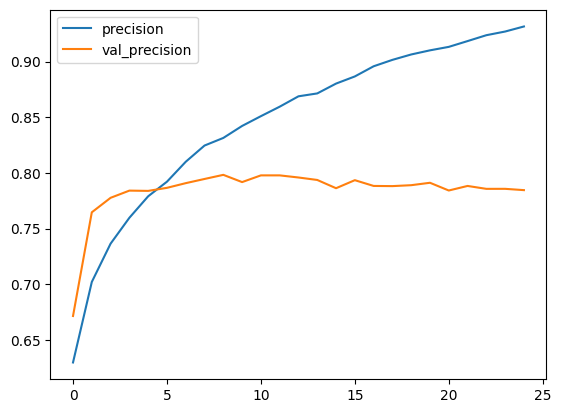

In [29]:
history_df.loc[:, ['precision', 'val_precision']].plot()

<Axes: >

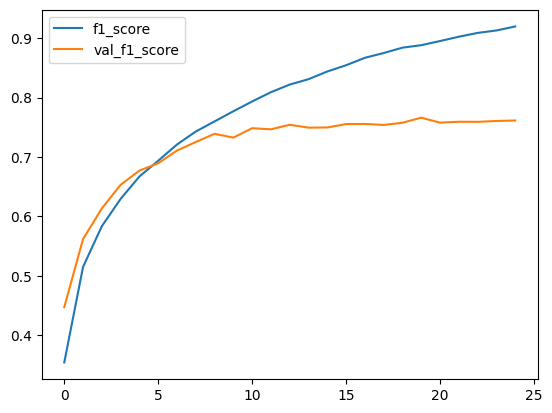

In [30]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

In [31]:
preds = model.predict(X_valid)

250/250 [==============================] - 2s 6ms/step


In [32]:
preds = np.argmax(preds, axis=1)
y_valid_idx = np.argmax(y_valid, axis=1)

In [33]:
print(classification_report(y_valid_idx, preds))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       792
           1       0.88      0.84      0.86       811
           2       0.79      0.57      0.66       801
           3       0.56      0.63      0.59       792
           4       0.67      0.80      0.73       804
           5       0.69      0.65      0.67       798
           6       0.77      0.86      0.81       786
           7       0.87      0.75      0.81       801
           8       0.87      0.85      0.86       806
           9       0.81      0.85      0.83       809

    accuracy                           0.76      8000
   macro avg       0.77      0.76      0.76      8000
weighted avg       0.77      0.76      0.76      8000



Text(0.5, 1.0, 'Predicted class:1  Real class:1')

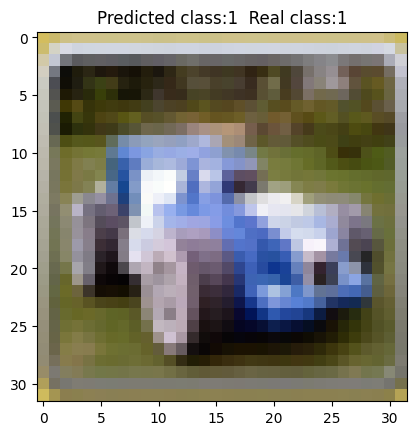

In [36]:
i = 1
plt.imshow(X_valid[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_valid_idx[i]))

In [35]:
model.save('Models/exp_1.keras')

# Exp 2
Добавим коллбеки

In [37]:
inputs = keras.Input(shape = (32,32,3))
x=keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=2)(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Conv2D(128, (2, 2), padding='same', activation='relu')(x)
x=keras.layers.MaxPooling2D((2, 2), strides=1)(x)
x=keras.layers.Flatten()(x)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model_2 = keras.models.Model(inputs = inputs, outputs = output)
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0   

In [38]:
model_2.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(average = 'weighted'), keras.metrics.Precision(), keras.metrics.Recall()])

In [39]:
learn_rate_red=keras.callbacks.ReduceLROnPlateau("val_loss", patience=3, factor = 0.5, min_lr=1e-6)
early_stop = keras.callbacks.EarlyStopping("val_loss", patience=6)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="Exp2_logs")

In [40]:
history_2 = model_2.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=50, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/50
196/196 [==============================] - 13s 65ms/step - loss: 1.6989 - f1_score: 0.3523 - precision_1: 0.6324 - recall_1: 0.1221 - val_loss: 1.4276 - val_f1_score: 0.4494 - val_precision_1: 0.7162 - val_recall_1: 0.2325 - lr: 5.0000e-04
Epoch 2/50
196/196 [==============================] - 13s 64ms/step - loss: 1.3221 - f1_score: 0.5103 - precision_1: 0.6979 - recall_1: 0.3173 - val_loss: 1.1712 - val_f1_score: 0.5734 - val_precision_1: 0.7666 - val_recall_1: 0.3770 - lr: 5.0000e-04
Epoch 3/50
196/196 [==============================] - 12s 61ms/step - loss: 1.1451 - f1_score: 0.5828 - precision_1: 0.7352 - recall_1: 0.4251 - val_loss: 1.1095 - val_f1_score: 0.6151 - val_precision_1: 0.7615 - val_recall_1: 0.4634 - lr: 5.0000e-04
Epoch 4/50
196/196 [==============================] - 12s 61ms/step - loss: 1.0298 - f1_score: 0.6291 - precision_1: 0.7602 - recall_1: 0.4994 - val_loss: 0.9623 - val_f1_score: 0.6608 - val_precision_1: 0.7833 - val_recall_1: 0.5355 - lr: 5.0000e

In [41]:
eval_hist_2 = model_2.evaluate(dataset_test)

8/8 [==============================] - 0s 36ms/step - loss: 0.7222 - f1_score: 0.7898 - precision_1: 0.8109 - recall_1: 0.7740


In [42]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist_2[0], 
                                                                                      eval_hist_2[1], 
                                                                                      eval_hist_2[2],
                                                                                      eval_hist_2[3]))

Eval_loss = 0.7222330570220947 
Eval_f1 = 0.7897682189941406 
Eval_precision = 0.8108958005905151 
Eval_recall = 0.7740000486373901


<Axes: >

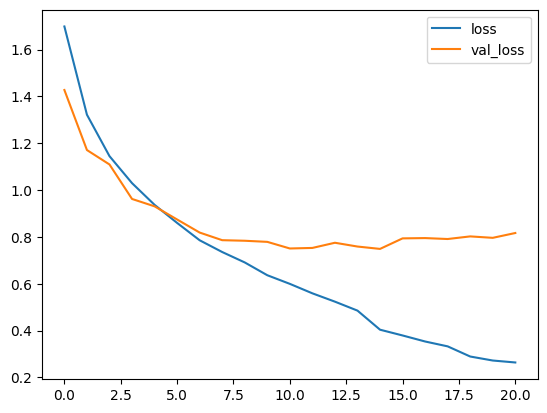

In [43]:
#График изменения функции потерь
history_df = pd.DataFrame(history_2.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

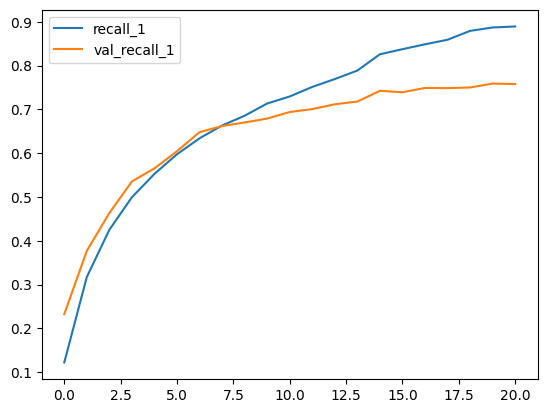

In [45]:
history_df.loc[:, ['recall_1', 'val_recall_1']].plot()

<Axes: >

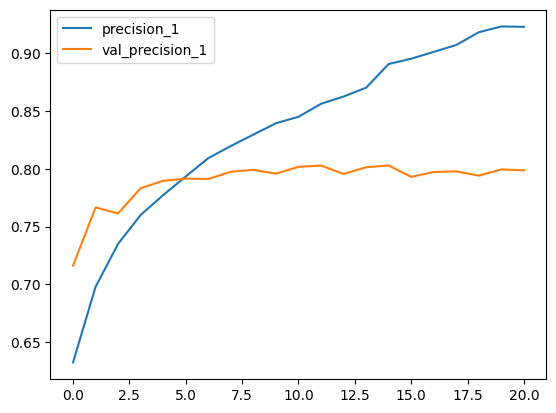

In [46]:
history_df.loc[:, ['precision_1', 'val_precision_1']].plot()

<Axes: >

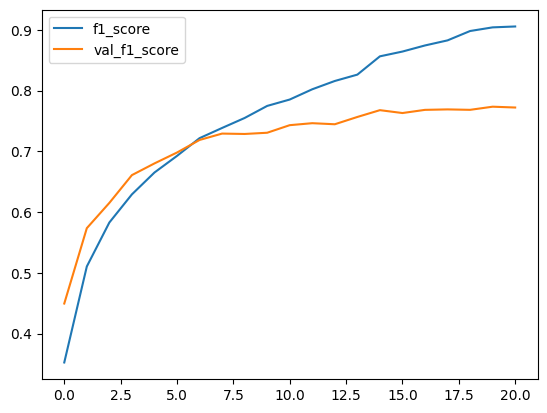

In [47]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

In [48]:
preds = model_2.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

63/63 [==============================] - 1s 8ms/step


In [49]:
print(classification_report(y_test_idx, preds))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       208
           1       0.95      0.84      0.89       189
           2       0.78      0.64      0.70       199
           3       0.60      0.58      0.59       208
           4       0.74      0.78      0.76       196
           5       0.68      0.75      0.71       202
           6       0.80      0.92      0.86       214
           7       0.85      0.82      0.84       199
           8       0.85      0.89      0.87       194
           9       0.80      0.90      0.84       191

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



Text(0.5, 1.0, 'Predicted class:9  Real class:9')

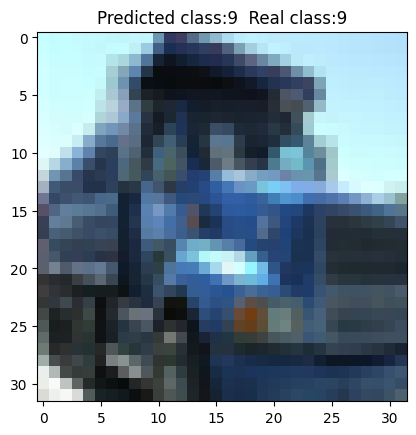

In [54]:
i = 0
plt.imshow(X_test[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_test_idx[i]))

In [55]:
model_2.save('Models/Exp_2_callbacks.keras')

# Exp 3
Используем предобученный бэкбон resnet50

In [56]:
base_resnet = keras.applications.resnet50.ResNet50(weights = 'imagenet', include_top=False, input_shape=(32,32,3), pooling = 'avg')

94765736/94765736 [==============================] - 4s 0us/step


In [57]:
inputs = keras.Input(shape = (32,32,3))
x= base_resnet(inputs)
x=keras.layers.Dense(1024, activation="relu", name='Dense_1')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(2046, activation='relu', name='Dense_2')(x)
x=keras.layers.Dense(512, activation='relu', name='Dense_3')(x)
x=keras.layers.Dense(256, activation='relu', name='Dense_4')(x)
output=keras.layers.Dense(10, activation='softmax', name='Output')(x)

model_3 = keras.models.Model(inputs = inputs, outputs = output)
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 Dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 Dense_2 (Dense)             (None, 2046)              2097150   
                                                                 
 Dense_3 (Dense)             (None, 512)               1048064   
                                                                 
 Dense_4 (Dense)             (None, 256)               1313

In [58]:
model_3.compile(keras.optimizers.legacy.Adam(0.0005), loss="categorical_crossentropy",
              metrics=[keras.metrics.F1Score(average = 'weighted'), keras.metrics.Precision(), keras.metrics.Recall()])

In [59]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="Exp3_logs")

In [60]:
history_3 = model_3.fit(dataset_train, validation_data=dataset_valid, 
                    epochs=50, callbacks=[learn_rate_red, early_stop, tensorboard])

Epoch 1/50
196/196 [==============================] - 123s 611ms/step - loss: 1.0993 - f1_score: 0.6253 - precision_2: 0.8002 - recall_2: 0.5048 - val_loss: 2.8857 - val_f1_score: 0.0277 - val_precision_2: 0.5660 - val_recall_2: 0.0075 - lr: 5.0000e-04
Epoch 2/50
196/196 [==============================] - 137s 699ms/step - loss: 0.5581 - f1_score: 0.8145 - precision_2: 0.8708 - recall_2: 0.7649 - val_loss: 3.6287 - val_f1_score: 0.0239 - val_precision_2: 0.1470 - val_recall_2: 0.0616 - lr: 5.0000e-04
Epoch 3/50
196/196 [==============================] - 146s 747ms/step - loss: 0.4052 - f1_score: 0.8665 - precision_2: 0.9023 - recall_2: 0.8335 - val_loss: 4.0123 - val_f1_score: 0.0487 - val_precision_2: 0.1252 - val_recall_2: 0.1148 - lr: 5.0000e-04
Epoch 4/50
196/196 [==============================] - 137s 697ms/step - loss: 0.3263 - f1_score: 0.8922 - precision_2: 0.9175 - recall_2: 0.8698 - val_loss: 1.6801 - val_f1_score: 0.4823 - val_precision_2: 0.5757 - val_recall_2: 0.4223 - lr:

In [61]:
eval_hist_3 = model_3.evaluate(dataset_test)

8/8 [==============================] - 2s 269ms/step - loss: 1.0277 - f1_score: 0.8523 - precision_2: 0.8546 - recall_2: 0.8520


In [62]:
print("Eval_loss = {} \nEval_f1 = {} \nEval_precision = {} \nEval_recall = {}".format(eval_hist_3[0], 
                                                                                      eval_hist_3[1], 
                                                                                      eval_hist_3[2],
                                                                                      eval_hist_3[3]))

Eval_loss = 1.0276724100112915 
Eval_f1 = 0.8522546291351318 
Eval_precision = 0.8545637130737305 
Eval_recall = 0.8520000576972961


<Axes: >

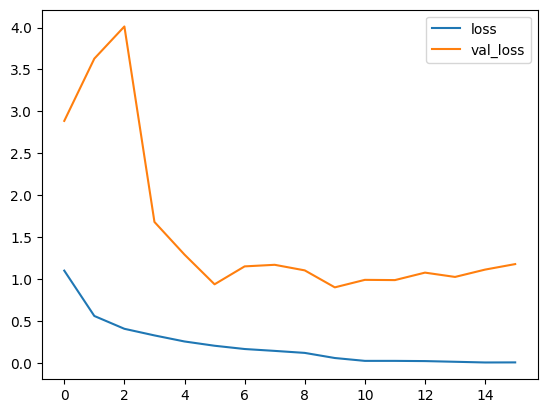

In [63]:
#График изменения функции потерь
history_df = pd.DataFrame(history_3.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

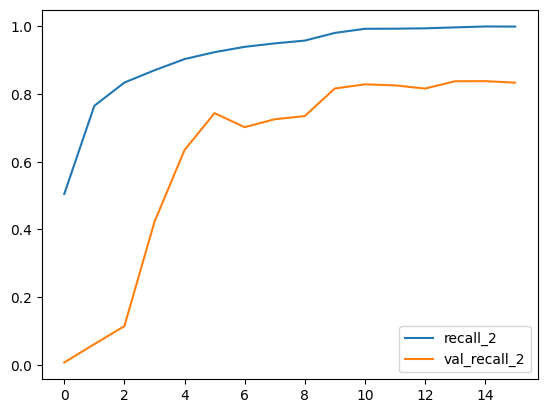

In [64]:
history_df.loc[:, ['recall_2', 'val_recall_2']].plot()

<Axes: >

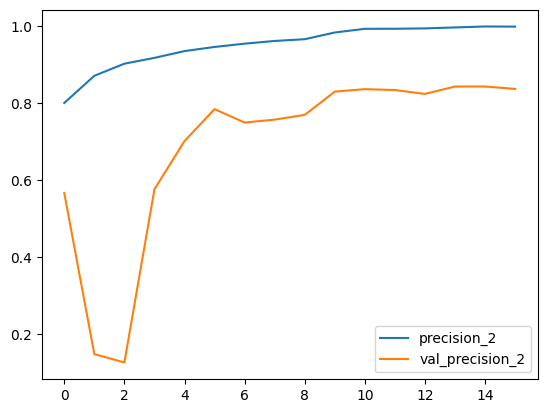

In [65]:
history_df.loc[:, ['precision_2', 'val_precision_2']].plot()

<Axes: >

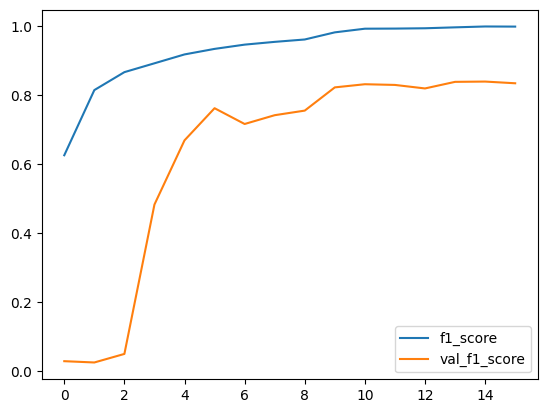

In [66]:
history_df.loc[:, ['f1_score', 'val_f1_score']].plot()

In [67]:
preds = model_3.predict(X_test)
preds = np.argmax(preds, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

63/63 [==============================] - 3s 36ms/step


In [68]:
print(classification_report(y_test_idx, preds))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       208
           1       0.90      0.92      0.91       189
           2       0.82      0.79      0.81       199
           3       0.74      0.70      0.72       208
           4       0.81      0.86      0.83       196
           5       0.82      0.77      0.79       202
           6       0.89      0.90      0.90       214
           7       0.89      0.89      0.89       199
           8       0.90      0.91      0.91       194
           9       0.89      0.87      0.88       191

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



Text(0.5, 1.0, 'Predicted class:9  Real class:9')

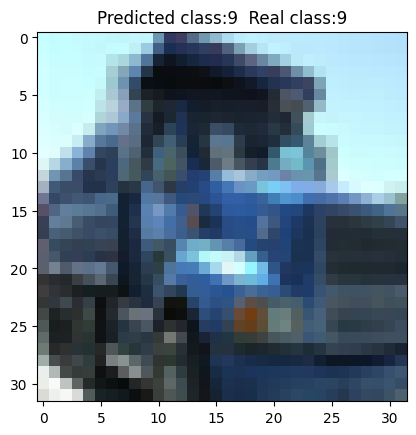

In [69]:
i = 0
plt.imshow(X_test[i])
plt.title('Predicted class:'+str(preds[i])+'  Real class:'+str(y_test_idx[i]))

In [70]:
model_3.save('Models/Exp3_pretrained.keras')

# Тест итоговой модели

В качестве итоговой возьмем лучшую модель (модель из 3 эксперимента).

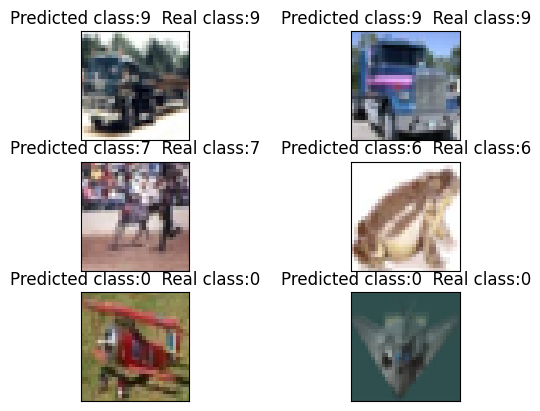

In [73]:
h, w = (2, 3)
fig, axs = plt.subplots(w, h)
for i in range(w):
    for j in range(h):
        num = np.random.randint(2000)
        axs[i, j].imshow(X_test[num])
        axs[i, j].set_title('Predicted class:'+str(preds[num])+'  Real class:'+str(y_test_idx[num]))
        axs[i, j].set(xticks=[], yticks=[])